In [2]:
import firebase_admin
import re
from firebase_admin import credentials
from firebase_admin import firestore
import matplotlib.pyplot as plt


# Carga las credenciales del servicio de Firebase
cred = credentials.Certificate("data/key.json")
firebase_admin.initialize_app(cred)

# Inicializa Firestore
db = firestore.client()

# Obtén todos los documentos de la colección "errors"
errors_ref = db.collection("errors").get()



In [3]:
def get_file(stacktrace_line):
    archivo_pattern = r"/([^/]+\.dart)"
    match = re.search(archivo_pattern, stacktrace_line)

    if match:
        return match.group(1)
    else:
        return None

In [4]:
def map_file_to_feature(filename):
    # Dictionary mapping files to features
    file_to_feature_mapping = {
        "database": [
            "firebase_options.dart",
            "firebase_service.dart",
        ],
        "restaurant detail": [
            "plate_entity.dart",
            "plate_repository.dart",
            "filter_menu.dart",
            "restaurant_detail.dart",
            "plate_view_model",
        ],
        "restaurants": [
            "restaurant_entity.dart",
            "restaurants.dart",
            "restaurant_view_model.dart",
            "offers.dart",
            "search_view.dart",
        ],
        "reviews": [
            "review_entity.dart",
            "review_repository.dart",
            "review_view_model.dart",
            "review_list.dart",
        ],
        "profile": [
            "user_entity.dart",
            "user_repository.dart",
            "profile.dart",
            "user_view_model",
        ],
        "authentication": [
            "auth_repository.dart",
            "landing.dart",
            "login.dart",
            "signup.dart",
            "shared_preferences.dart",
        ],
        "location": [
            "location_repository.dart",
            "distance_calculator.dart",
        ],
        "navigation": [
            "routes.dart",
        ],
        "others": [
            "string_utils.dart",
        ],
        "points": [
            "points.dart",
        ],
        "preferences": [
            "preferences.dart",
        ],
        "smart feature": [
            "favorites.dart",
        ],
    }

    # Find the feature that contains the filename
    for feature, files in file_to_feature_mapping.items():
        if filename in files:
            return feature

    # If the filename is not found, return None
    return None


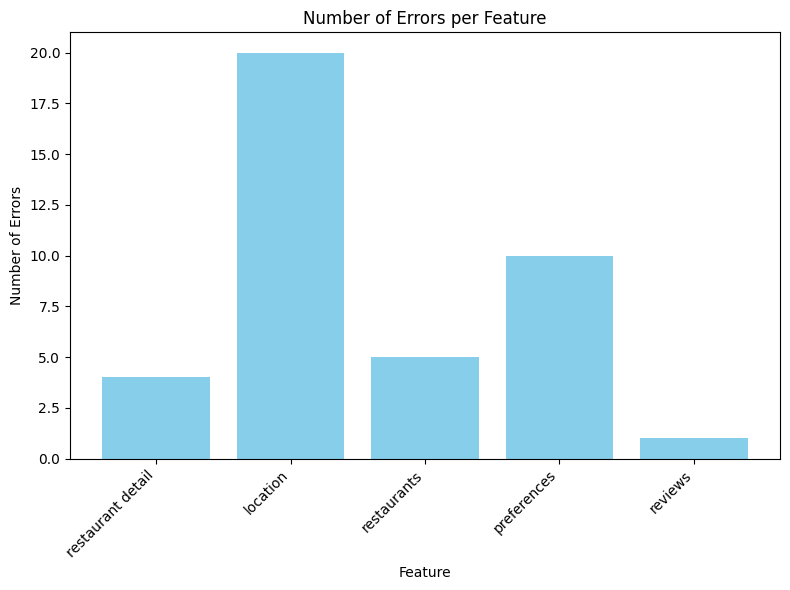

In [9]:
# Dictionary to store the frequency of errors per feature
errors_per_feature = {}

# Iterate over each document and extract the information
for error in errors_ref:
    data = error.to_dict()
    stacktrace = data.get("stacktrace")

    filename = None
    if stacktrace:
        stacktrace_lines = stacktrace.split("\n")
        if len(stacktrace_lines) > 1:
            line = stacktrace_lines[0]
            if "(package" in line:
                filename = line.split("( package")[-1].strip()
                if filename.endswith(".dart") :
                    filename = filename.split(",")[0]
    if filename != None:
      filename = get_file(filename)


      feature = map_file_to_feature(filename)

      if feature:
          # Update the frequency of errors per feature
          if feature in errors_per_feature:
              errors_per_feature[feature] += 1
          else:
              errors_per_feature[feature] = 1

# Plot the number of errors per feature
plt.figure(figsize=(8, 6))
plt.bar(errors_per_feature.keys(), errors_per_feature.values(), color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Number of Errors')
plt.title('Number of Errors per Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
